# Laboratorio 1 - Naomi Lara 18001404

### Se importan librerias a utilizar y se carga el dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataHP=pd.read_csv('train_HP.csv')
dataHP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Filtración de columnas 
Se realiza un filtrado de todas aquellas columnas que tengan una proporcion de valores nulos mayor al 5% de la totalidad de los datos 

In [3]:
#Se lista todas las columnas que poseen nulos, despues se aplica promedio y si el promedio es menor al 0.05 quiere decir
# que esas columnas si se puede aplicar la tecnicas de imputacion y no son descartables
cols_rescatables=[col for col in dataHP.columns if (dataHP[col].isnull().mean()<=0.05)]
d=dataHP[cols_rescatables]
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Clasificacion de columna en categorica y numerica
Esto con la finalidad de facilitar el proceso de imputacion de datos, se subdivide segun es necesario imputacion por existencia de nulos o no

In [7]:
catNull=[col for col in d.columns if ((d[col].isnull().mean()!=0 )and (d[col].dtypes=='object') )]
catGen=[col for col in d.columns if (d[col].dtypes=='object')]
numNull=[col for col in d.columns if ((d[col].isnull().mean()!=0 )and (d[col].dtypes!='object'))]
numGen=[col for col in d.columns if ((d[col].dtypes!='object'))]

Se estudia el comportamiento de categorica y numerica segun la cantidad de nulos de la columna

In [8]:
#comportamiento de numericas que tienen nulo
d[numNull].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MasVnrArea  1452 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [9]:
#comportamiento de categoricas tienen nulo
d[catNull].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MasVnrType    1452 non-null   object
 1   BsmtQual      1423 non-null   object
 2   BsmtCond      1423 non-null   object
 3   BsmtExposure  1422 non-null   object
 4   BsmtFinType1  1423 non-null   object
 5   BsmtFinType2  1422 non-null   object
 6   Electrical    1459 non-null   object
dtypes: object(7)
memory usage: 80.0+ KB


### Tratamiento de variable numerica: comprobacion de metodos de imputacion 

In [ ]:
d['MasVnrArea_Mean']=np.round(d['MasVnrArea'].fillna(d['MasVnrArea'].mean()))
d['MasVnrArea_Median']=np.round(d['MasVnrArea'].fillna(d['MasVnrArea'].median()))

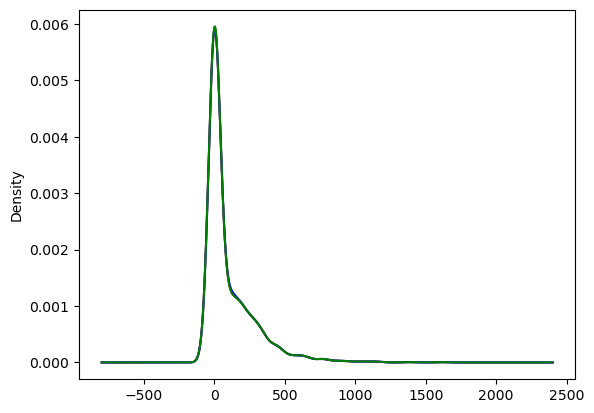

In [11]:
d['MasVnrArea'].plot.density(color='red',label='Original')
d['MasVnrArea_Mean'].plot.density(color='blue',label='Media')
d['MasVnrArea_Median'].plot.density(color='green',label='Mediana')
plt.show()

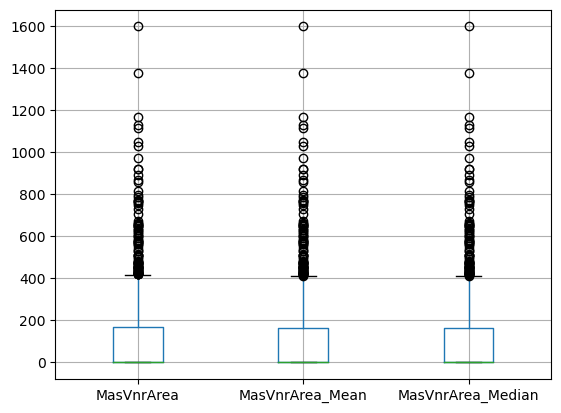

In [12]:
d[['MasVnrArea','MasVnrArea_Mean','MasVnrArea_Median']].boxplot()
plt.show()

En este caso la imputacion ya sea por la media o mediana no afecta significativamente la forma de la distribucion dado que los valores nulos representan aproximadamente el 0.5% de los datos (1460-1452/1460)

In [ ]:
# Se opta por imputar la media
d['MasVnrArea']=np.round(d['MasVnrArea'].fillna(d['MasVnrArea'].mean()))

### Analisis de categorias

In [14]:
#funcion que devuelve categorias que tiene la columna y la frecuencia de cada una
def categorias(d):
    r=[]
    for col in d.columns:
        r.append(d[col].value_counts().to_dict())
    return r

In [15]:
print(f"Listado columnas: \n\n{catNull} \n\nListado de valores:\n ")
categorias(d[catNull])

Listado columnas: 

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical'] 

Listado de valores:
 


[{'None': 864, 'BrkFace': 445, 'Stone': 128, 'BrkCmn': 15},
 {'TA': 649, 'Gd': 618, 'Ex': 121, 'Fa': 35},
 {'TA': 1311, 'Gd': 65, 'Fa': 45, 'Po': 2},
 {'No': 953, 'Av': 221, 'Gd': 134, 'Mn': 114},
 {'Unf': 430, 'GLQ': 418, 'ALQ': 220, 'BLQ': 148, 'Rec': 133, 'LwQ': 74},
 {'Unf': 1256, 'Rec': 54, 'LwQ': 46, 'BLQ': 33, 'ALQ': 19, 'GLQ': 14},
 {'SBrkr': 1334, 'FuseA': 94, 'FuseF': 27, 'FuseP': 3, 'Mix': 1}]

In [16]:
def graficas(d,do):
    for col in d.columns:
        d[col].value_counts().plot.bar()
        plt.ylabel('Cantidad')
        plt.xlabel(d[col].name)
        plt.show()

        sns.boxplot(x=d[col],y=do)
        plt.show()

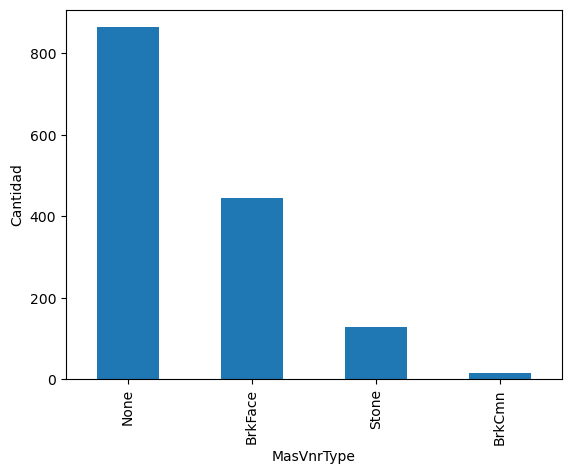

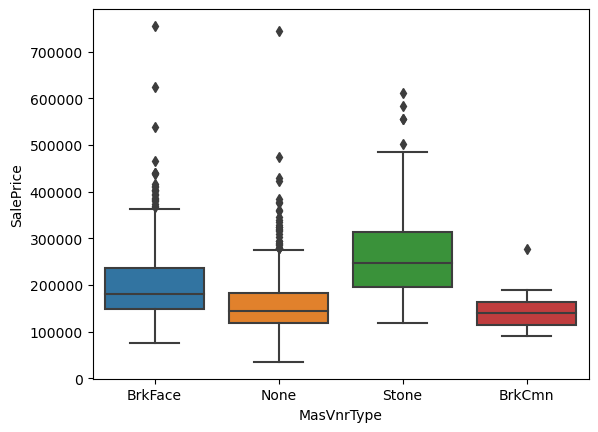

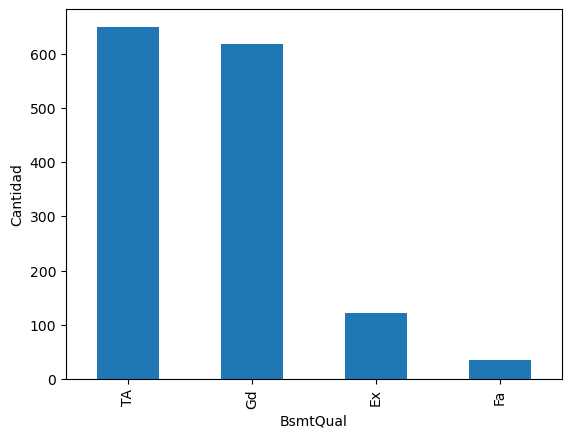

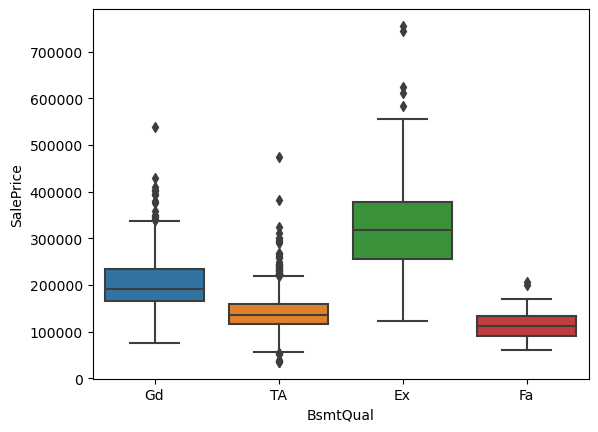

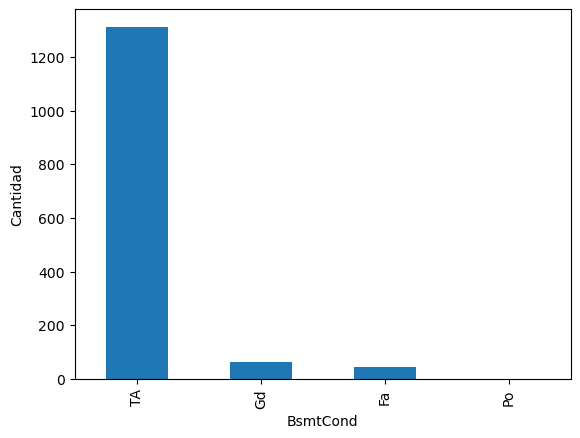

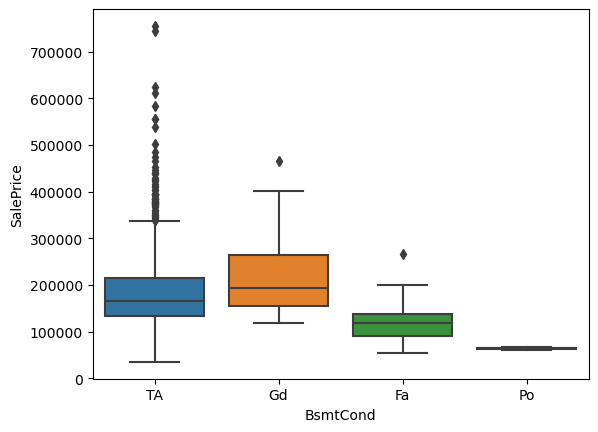

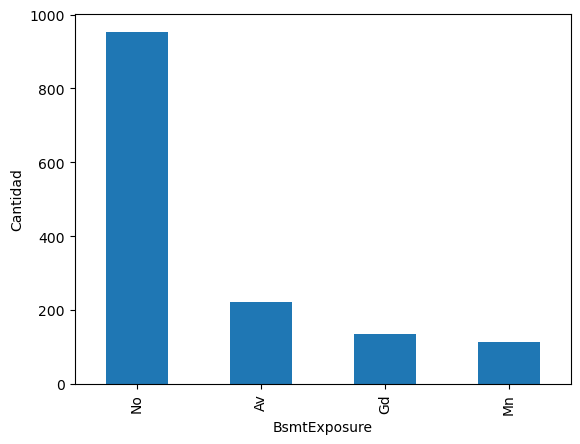

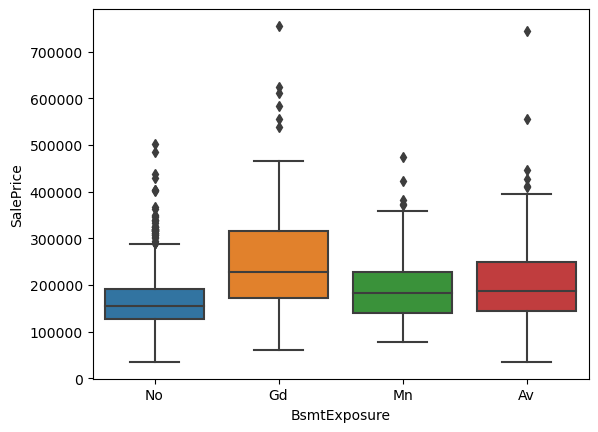

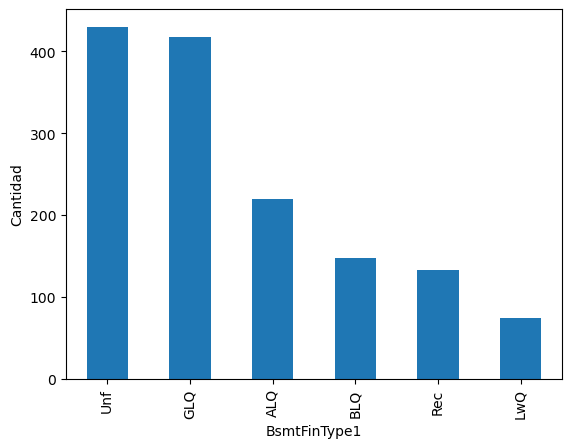

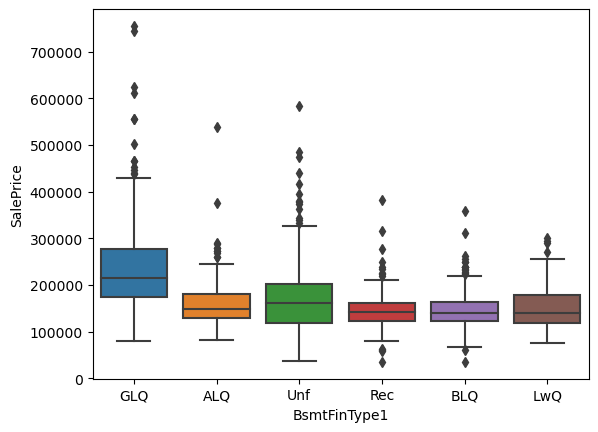

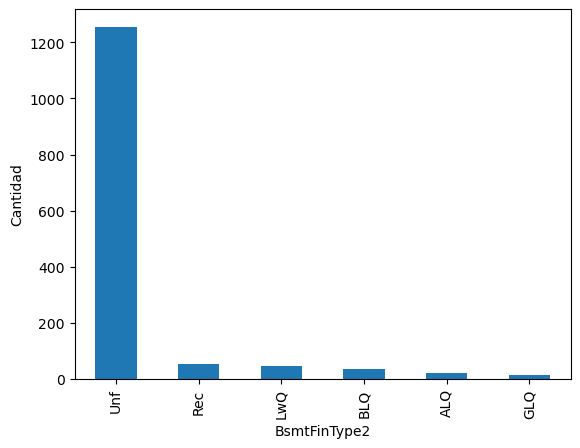

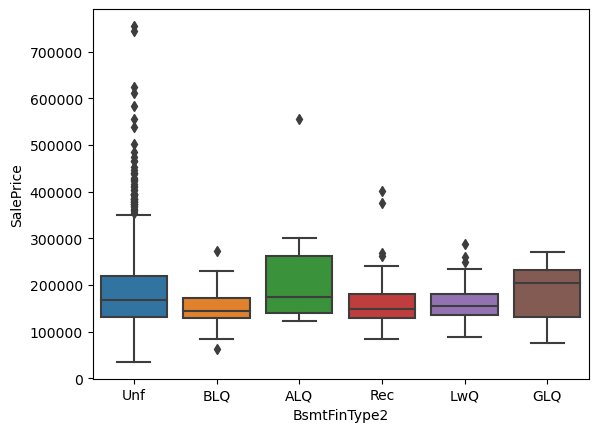

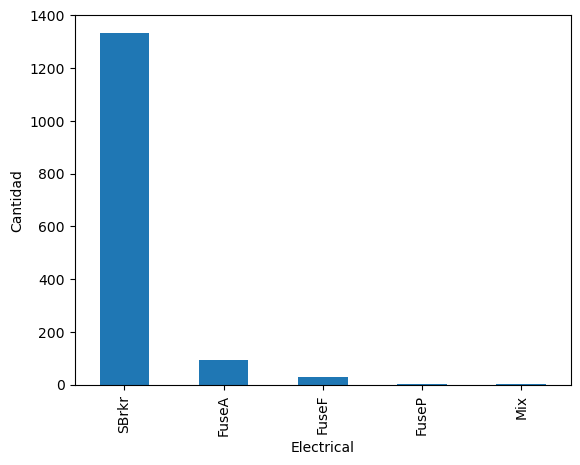

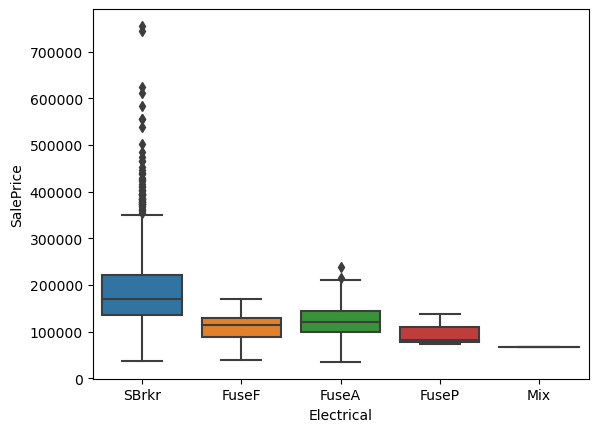

In [17]:
graficas(d[catNull],d['SalePrice'])

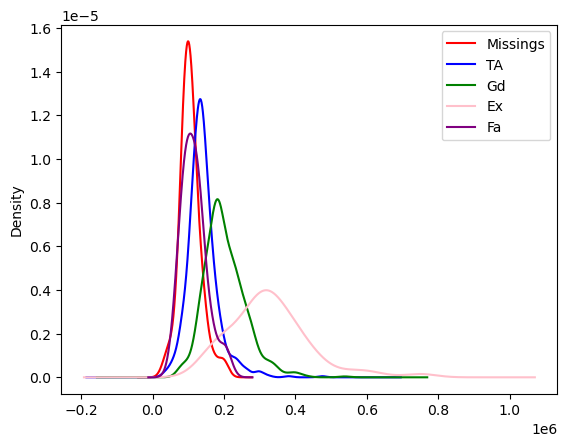

In [18]:
fig = plt.figure()
# 111 hace que caiga a una misma grafica todo
ax = fig.add_subplot(111)
#que pasa si impunto Missings en datos faltantes
d[d['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
#que pasa si impunto TA en datos faltantes
d[d['BsmtQual'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
d[d['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
d[d['BsmtQual'] == 'Ex']['SalePrice'].plot(kind="kde", color="pink", label="Ex")
d[d['BsmtQual'] == 'Fa']['SalePrice'].plot(kind="kde", color="purple", label="Fa")
ax.legend()
plt.show()

En este caso, la imputación se realizará con la categoría Fa dado que el impacto que tiene sobre la variable dependiente es mínima y al momento de imputarla no modifica significativamente la distribución original

In [ ]:
d['BsmtQual'].fillna('Fa',inplace=True) #imputacion de variable categorica 

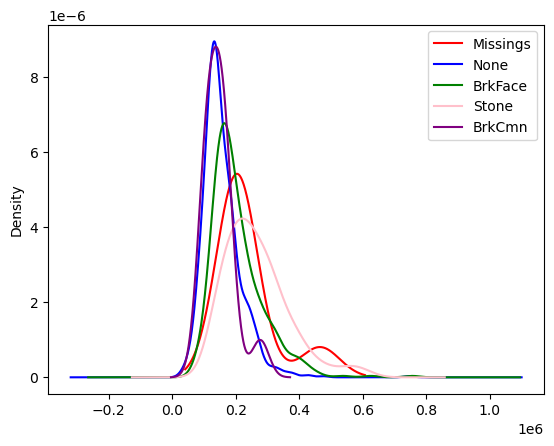

In [20]:
fig = plt.figure()
# 111 hace que caiga a una misma grafica todo
ax = fig.add_subplot(111)
#que pasa si impunto Missings en datos faltantes
d[d['MasVnrType'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
#que pasa si impunto TA en datos faltantes
d[d['MasVnrType'] == 'None']['SalePrice'].plot(kind="kde", color="blue", label="None")
d[d['MasVnrType'] == 'BrkFace']['SalePrice'].plot(kind="kde", color="green", label="BrkFace")
d[d['MasVnrType'] == 'Stone']['SalePrice'].plot(kind="kde", color="pink", label="Stone")
d[d['MasVnrType'] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="purple", label="BrkCmn")
ax.legend()
plt.show()

En este caso, la imputación se realizará con la categoría BrkCmn dado que el impacto que tiene sobre la variable dependiente es mínima y al momento de imputarla no modifica significativamente la distribución original

In [ ]:
d['MasVnrType'].fillna('BrkCmn',inplace=True) #imputacion de variable categorica 

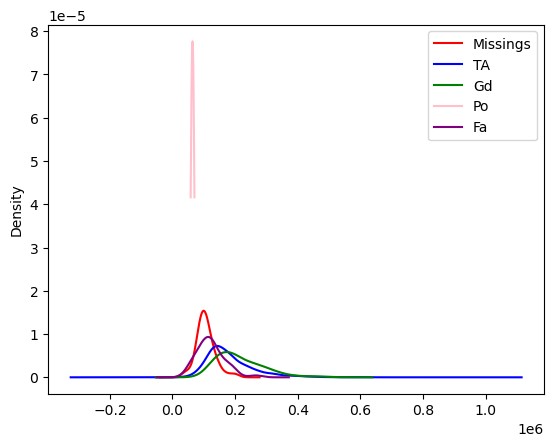

In [22]:
fig = plt.figure()
# 111 hace que caiga a una misma grafica todo
ax = fig.add_subplot(111)
#que pasa si impunto Missings en datos faltantes
d[d['BsmtCond'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
#que pasa si impunto TA en datos faltantes
d[d['BsmtCond'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
d[d['BsmtCond'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
d[d['BsmtCond'] == 'Po']['SalePrice'].plot(kind="kde", color="pink", label="Po")
d[d['BsmtCond'] == 'Fa']['SalePrice'].plot(kind="kde", color="purple", label="Fa")
ax.legend()
plt.show()

En este caso, la imputación se realizará con la categoría Fa dado que el impacto que tiene sobre la variable dependiente es mínima y al momento de imputarla no modifica significativamente la distribución original

In [ ]:
d['BsmtCond'].fillna('Fa',inplace=True) #imputacion de variable categorica 

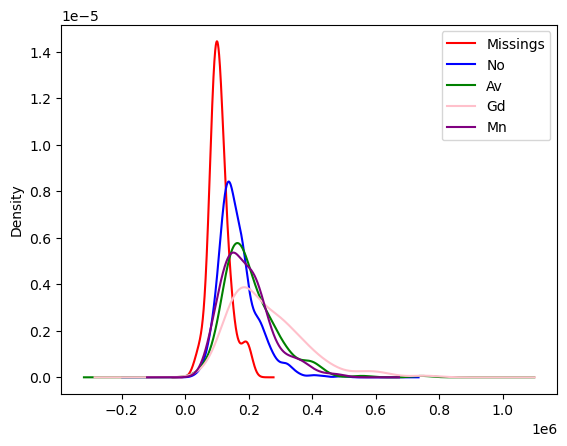

In [24]:
fig = plt.figure()
# 111 hace que caiga a una misma grafica todo
ax = fig.add_subplot(111)
#que pasa si impunto Missings en datos faltantes
d[d['BsmtExposure'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
#que pasa si impunto TA en datos faltantes
d[d['BsmtExposure'] == 'No']['SalePrice'].plot(kind="kde", color="blue", label="No")
d[d['BsmtExposure'] == 'Av']['SalePrice'].plot(kind="kde", color="green", label="Av")
d[d['BsmtExposure'] == 'Gd']['SalePrice'].plot(kind="kde", color="pink", label="Gd")
d[d['BsmtExposure'] == 'Mn']['SalePrice'].plot(kind="kde", color="purple", label="Mn")
ax.legend()
plt.show()

En este caso se imputará No dado que es el valor mas frecuente y según el grafico de cajas y bigotes se muestra que no tiene mucho impacto sobre la variable dependiente

In [ ]:
d['BsmtExposure'].fillna('No',inplace=True) #imputacion de variable categorica 

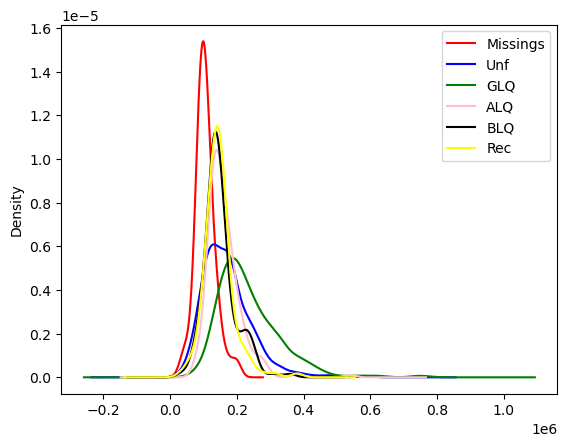

In [26]:
fig = plt.figure()
# 111 hace que caiga a una misma grafica todo
ax = fig.add_subplot(111)
#que pasa si impunto Missings en datos faltantes
d[d['BsmtFinType1'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
#que pasa si impunto TA en datos faltantes
d[d['BsmtFinType1'] == 'Unf']['SalePrice'].plot(kind="kde", color="blue", label="Unf")
d[d['BsmtFinType1'] == 'GLQ']['SalePrice'].plot(kind="kde", color="green", label="GLQ")
d[d['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="pink", label="ALQ")
d[d['BsmtFinType1'] == 'BLQ']['SalePrice'].plot(kind="kde", color="black", label="BLQ")
d[d['BsmtFinType1'] == 'Rec']['SalePrice'].plot(kind="kde", color="yellow", label="Rec")

ax.legend()
plt.show()

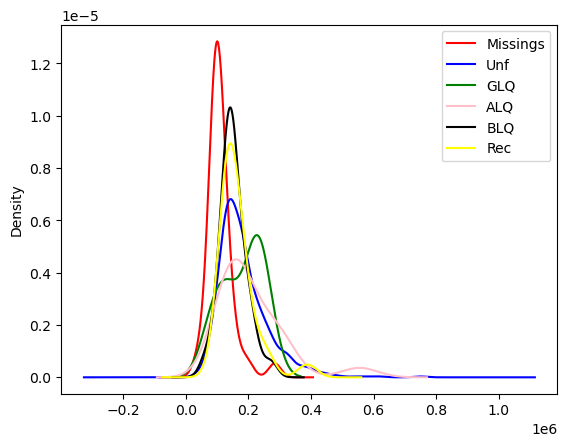

In [27]:
fig = plt.figure()
# 111 hace que caiga a una misma grafica todo
ax = fig.add_subplot(111)
#que pasa si impunto Missings en datos faltantes
d[d['BsmtFinType2'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
#que pasa si impunto TA en datos faltantes
d[d['BsmtFinType2'] == 'Unf']['SalePrice'].plot(kind="kde", color="blue", label="Unf")
d[d['BsmtFinType2'] == 'GLQ']['SalePrice'].plot(kind="kde", color="green", label="GLQ")
d[d['BsmtFinType2'] == 'ALQ']['SalePrice'].plot(kind="kde", color="pink", label="ALQ")
d[d['BsmtFinType2'] == 'BLQ']['SalePrice'].plot(kind="kde", color="black", label="BLQ")
d[d['BsmtFinType2'] == 'Rec']['SalePrice'].plot(kind="kde", color="yellow", label="Rec")

ax.legend()
plt.show()

En ambas graficas se imputara BLQ dado que su distribución es la más similar a la original

In [ ]:
d['BsmtFinType1'].fillna('BLQ',inplace=True) #imputacion de variable categorica 
d['BsmtFinType2'].fillna('BLQ',inplace=True) #imputacion de variable categorica 

En el caso de Electrical se colocará el valor mas frecuente dado que se trata de un unico valor nulo

In [ ]:
d['Electrical'].fillna('SBrkr',inplace=True) #imputacion de variable categorica 

Se aplica codificación de todas las variables categoricas utilizando como método de codificación la frecuencia de las categorías y su orden alfabetico de forma ascendente 

In [ ]:
# para todas las columnas con valores categoricos se codifica segun frecuencia y orden alfabetico 
for c in d[catGen].columns:
    Variable_freq_mapper=(d[c].value_counts().sort_values(ascending=False)).to_dict()
    code=c+'_code'
    d[code]=d[c].map(Variable_freq_mapper)

In [32]:
d.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,BsmtFinType2_code,Heating_code,HeatingQC_code,CentralAir_code,Electrical_code,KitchenQual_code,Functional_code,PavedDrive_code,SaleType_code,SaleCondition_code
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1256,1428,741,1365,1335,586,1360,1340,1267,1198
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,1256,1428,741,1365,1335,735,1360,1340,1267,1198
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,1256,1428,741,1365,1335,586,1360,1340,1267,1198
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,1256,1428,241,1365,1335,586,1360,1340,1267,101
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,1256,1428,741,1365,1335,586,1360,1340,1267,1198
